In [87]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

In [88]:
# Function to solve MVT
def solveMVT(exp, a, c, x):
    df = sym.diff(exp, x)
    val_one = exp.subs({x: a})
    val_two = exp.subs({x: c})
    slope = (val_two - val_one) / (c - a)
    new_exp = df - slope
    critical_points = sym.solve(new_exp, x)
    critical_points = np.array(critical_points).astype(np.float64)
    valid_points = critical_points[(critical_points > a) & (critical_points < c)]
    return valid_points

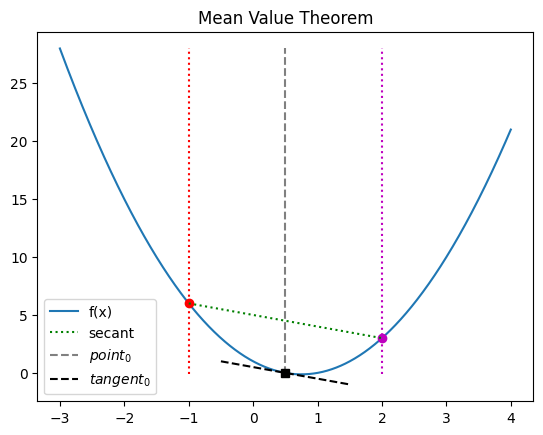

In [89]:
x = sym.symbols('x')

exp = 2*(x**2) - 3*x + 1
a = -1
c = 2

critical_point = solveMVT(exp, a, c, x)


def make_plot(critical_point, exp, a, c):
    fx = sym.lambdify(x, exp)
    dx = sym.lambdify(x, sym.diff(exp, x))
    xx = np.linspace(a - 2, c + 2, 1001)
    y = fx(xx)

    # plotting the function.
    plt.plot(xx, y, label='f(x)')
    plt.plot(a, fx(a), 'ro')
    plt.plot(c, fx(c), 'mo')
    plt.plot([a, a], [np.min(y), np.max(y)], 'r:')
    plt.plot([c, c], [np.min(y), np.max(y)], 'm:')
    plt.plot([a, c], [fx(a), fx(c)], 'g:', label='secant')

    for i, points in enumerate(critical_point):
        plt.plot([points, points], [np.min(y), np.max(y)], '--', color = 'gray',label=f'$point_{i}$')
        plt.plot(points, fx(points), 'ks')
        # plotting the tangent
        tangX = [points - 1, points + 1]
        tangY = dx(points)*(np.array(tangX) - points) + fx(points)
        plt.plot(tangX, tangY, 'k--', label=f'$tangent_{i}$')

    plt.title('Mean Value Theorem')
    plt.legend()
    plt.show()

make_plot(critical_point, exp, a, c)

## Exercise 3

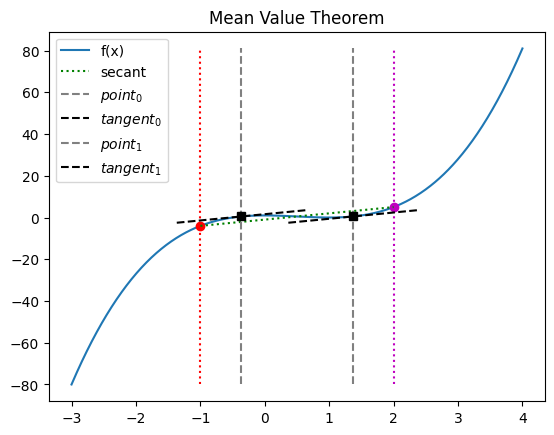

In [90]:
exp1 = 2*x**3 - 3*x**2 + 1
a1 = -1
c1 = 2
critical_point = solveMVT(exp1, a1, c1, x)
make_plot(exp=exp1, a=a1, c=c1, critical_point=critical_point)

0 5.654866776461628


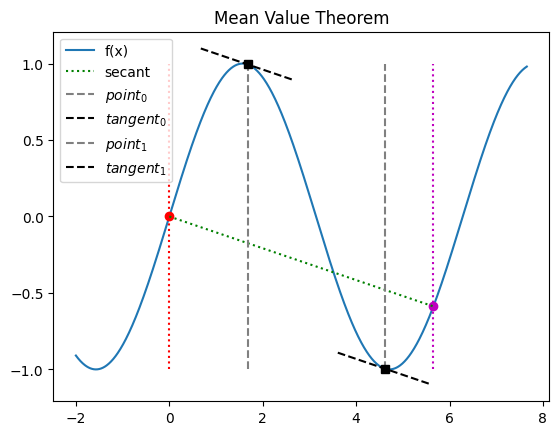

In [91]:
exp2 = sym.sin(x)
a2 = 0
c2 = 1.8*np.pi
print(a2, c2)
critical_point = solveMVT(exp2, a2, c2, x)
make_plot(exp=exp2, a=a2, c=c2, critical_point=critical_point)

## Exercise 4

In [92]:
exp3 = 2*x / ((2*(x**2) + 1)**2)
a3 = -2
c3 = 1
b3 = solveMVT(exp3, a3, c3, x)
make_plot(exp3, a3, c3, critical_point=b3)

TypeError: Cannot convert complex to float

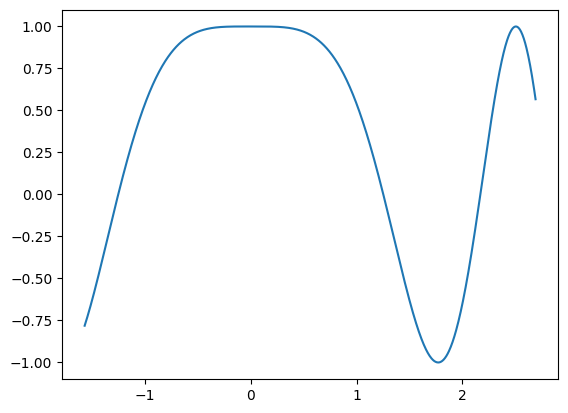

In [119]:
# Exercise 5 : Numerical approximation using numpy.


# Not able to understand this exercise. need to look at this again.
theta = sym.symbols('theta')
exp4 = sym.cos(theta**2)
a4 = -np.pi / 2
c4 = 6*np.pi / 7
dff = sym.diff(exp4)
y2 = exp4.subs(theta, c4)
y1 = exp4.subs(theta, a4)
m = (y2 - y1) / (c4 - a4)
expr = dff - m

df = sym.lambdify(theta, exp4)

xlim = [a4, c4]
xx = np.linspace(xlim[0], xlim[1], 1001)

instant_df = df(xx)
plt.plot(xx, instant_df, label='Derivative of Each Point')
plt.show()




    
